In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchview import draw_graph
import os

from common import h5dataset, onnxexporter, model_dnn, trainer


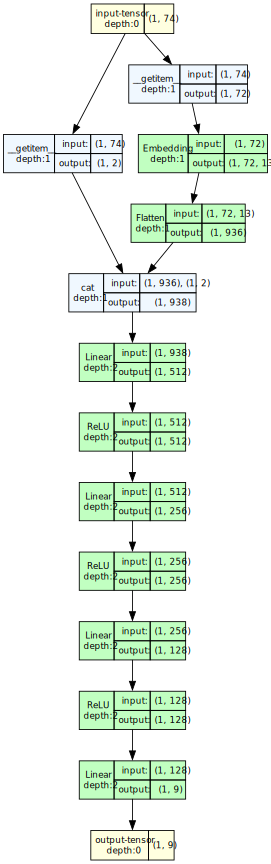

In [2]:
# Plot model graph
model = model_dnn.ModelDNNWithScore(
    name="JassPlayWithScore",
    input_size=74,
    embedding_size=13,
    hidden_size=[512, 256, 128],
    output_size=9,
)
model_graph = draw_graph(model, torch.zeros(1, 74).long(), show_shapes=True)
model_graph.visual_graph

In [3]:
DATASET_PATH = '../log_parser/dataset/flat_playing_with_score.hdf5'
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATASET_PATH}")

MODLE_PATH = './models/play_with_score'
if not os.path.exists(MODLE_PATH):
    os.makedirs(MODLE_PATH)

LOGS_PATH = './logs/play_with_score'
if not os.path.exists(LOGS_PATH):
    os.makedirs(LOGS_PATH)

In [4]:
BATCH_SIZE = 256
NUM_EPOCHS = 20
LEARNING_RATE = 1e-3
SEED = 42

torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
dataset = h5dataset.H5Dataset(DATASET_PATH)
train_dataset, val_dataset = dataset.split(0.8)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)


accuracy_fn = lambda y_pred, y_true: (y_pred.argmax(dim=1) == y_true).float().mean()
loss_fn = lambda y_pred, y_true: F.nll_loss(F.log_softmax(y_pred, dim=1), y_true)

# set up trainer
trainer = trainer.Trainer(
    train_loader=train_loader,
    val_loader=val_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    model_path=MODLE_PATH,
    device=device
)

Using device: cuda


In [8]:
# train the model
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
trainer.train(NUM_EPOCHS, model, optimizer)

Training model: JassPlayWithScore_512_256_128_dnn


Validation Epoch 1: 100%|██████████| 17326/17326 [01:10<00:00, 246.88it/s]


Epoch 1/20 - Train Loss: 0.8389, Train Accuracy: 64.5952, Val Loss: 0.7577, Val Accuracy: 68.1833
Model saved at epoch 1 with validation loss 0.7577


Validation Epoch 2: 100%|██████████| 17326/17326 [00:59<00:00, 289.66it/s]


Epoch 2/20 - Train Loss: 0.7359, Train Accuracy: 69.2155, Val Loss: 0.7285, Val Accuracy: 69.5510
Model saved at epoch 2 with validation loss 0.7285


Validation Epoch 3: 100%|██████████| 17326/17326 [00:59<00:00, 288.82it/s]


Epoch 3/20 - Train Loss: 0.7083, Train Accuracy: 70.5049, Val Loss: 0.7046, Val Accuracy: 70.6756
Model saved at epoch 3 with validation loss 0.7046


Validation Epoch 4: 100%|██████████| 17326/17326 [01:07<00:00, 256.96it/s]


Epoch 4/20 - Train Loss: 0.6936, Train Accuracy: 71.2770, Val Loss: 0.6907, Val Accuracy: 71.5302
Model saved at epoch 4 with validation loss 0.6907


Validation Epoch 5: 100%|██████████| 17326/17326 [00:57<00:00, 303.71it/s]


Epoch 5/20 - Train Loss: 0.6838, Train Accuracy: 71.7586, Val Loss: 0.6850, Val Accuracy: 71.7364
Model saved at epoch 5 with validation loss 0.6850


Validation Epoch 6: 100%|██████████| 17326/17326 [01:08<00:00, 254.21it/s]


Epoch 6/20 - Train Loss: 0.6773, Train Accuracy: 72.0815, Val Loss: 0.6836, Val Accuracy: 71.9205
Model saved at epoch 6 with validation loss 0.6836


Validation Epoch 7: 100%|██████████| 17326/17326 [01:07<00:00, 258.05it/s]


Epoch 7/20 - Train Loss: 0.6732, Train Accuracy: 72.2722, Val Loss: 0.6770, Val Accuracy: 72.0573
Model saved at epoch 7 with validation loss 0.6770


Validation Epoch 8: 100%|██████████| 17326/17326 [01:07<00:00, 256.83it/s]


Epoch 8/20 - Train Loss: 0.6702, Train Accuracy: 72.4221, Val Loss: 0.6694, Val Accuracy: 72.4327
Model saved at epoch 8 with validation loss 0.6694


Validation Epoch 9: 100%|██████████| 17326/17326 [01:07<00:00, 257.33it/s]


Epoch 9/20 - Train Loss: 0.6677, Train Accuracy: 72.5439, Val Loss: 0.6690, Val Accuracy: 72.4427
Model saved at epoch 9 with validation loss 0.6690


Validation Epoch 10: 100%|██████████| 17326/17326 [01:07<00:00, 256.32it/s]


Epoch 10/20 - Train Loss: 0.6655, Train Accuracy: 72.6538, Val Loss: 0.6614, Val Accuracy: 72.8372
Model saved at epoch 10 with validation loss 0.6614


Validation Epoch 11: 100%|██████████| 17326/17326 [01:07<00:00, 256.54it/s]


Epoch 11/20 - Train Loss: 0.6637, Train Accuracy: 72.7644, Val Loss: 0.6617, Val Accuracy: 72.8407


Validation Epoch 12: 100%|██████████| 17326/17326 [01:07<00:00, 256.40it/s]


Epoch 12/20 - Train Loss: 0.6619, Train Accuracy: 72.8642, Val Loss: 0.6633, Val Accuracy: 72.8067


Validation Epoch 13: 100%|██████████| 17326/17326 [01:01<00:00, 279.63it/s]

Epoch 13/20 - Train Loss: 0.6612, Train Accuracy: 72.9177, Val Loss: 0.6641, Val Accuracy: 72.8097


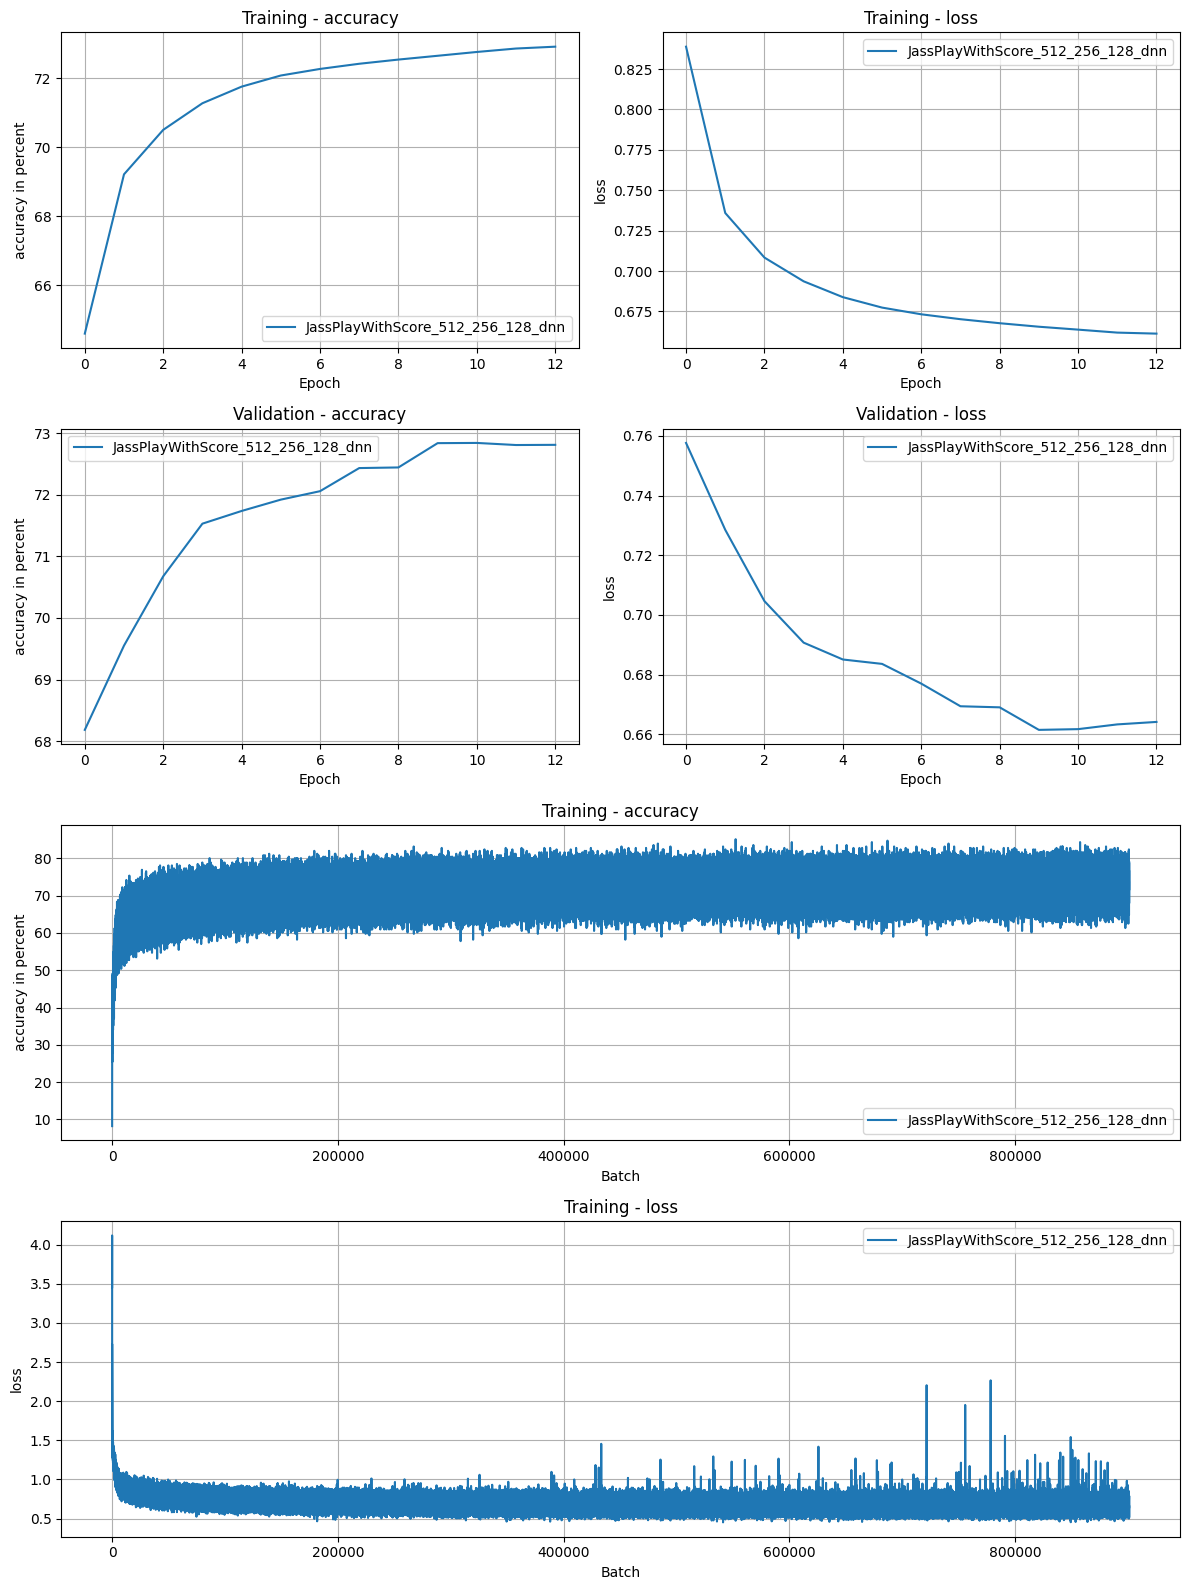

In [ ]:
# create graphs
trainer.monitor.plot()

In [10]:
trainer.monitor.dump(dump_path=LOGS_PATH, filename="monitor")

In [11]:
# export the model to ONNX
model = model.to("cpu")
ONNX_PATH = f"{MODLE_PATH}/{model.name}.onnx"
onnxexporter.onnx_exporter(
    model=model,
    in_dim=72,
    output_path=ONNX_PATH
)

Exporting model to ONNX format...
Error exporting model to ONNX: mat1 and mat2 shapes cannot be multiplied (1x912 and 938x512)
